In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import Symbol, expand
PDEG = 18

#### 1. Data from video ####

In [61]:
data_file = "../lab_data/video_data/20231128_DSC_1763.txt"
#data_file = "../lab_data/video_data/20230621.txt"

vid_data = np.loadtxt(data_file,unpack=True)
N = vid_data.shape[0]-1
tl, xl = np.vsplit(vid_data, [1])
tl = tl.reshape(-1)

poly_xl = [ np.polyfit(tl, x, PDEG) for x in xl ]
fxl = [ (lambda t, px=p: np.polyval(px, t)) for p in poly_xl ]

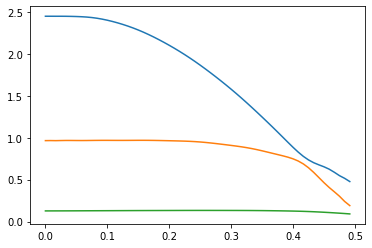

In [62]:
for f in fxl:
    plt.plot(tl, f(tl));

#### 2. Numeric data ####

In [63]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [64]:
# Data from our springs and masses
L0 = 0.4639
KK = 0.4399
MM = 56.6E-3
g = 9.81

In [65]:
# Simple run
k = KK * (N - 1)
m = MM
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))

soluc = solve_ivp(rhs2, [0, tl[-1]], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))

poly_xn = [ np.polyfit(tn, x, PDEG) for x in xn ]

# O valor de tshift tem que ser ajustado à mão para cada ficheiro
tshift = -0.055
fxn = [ (lambda t, px=px: np.polyval(px, t+tshift)) for px in poly_xn ]

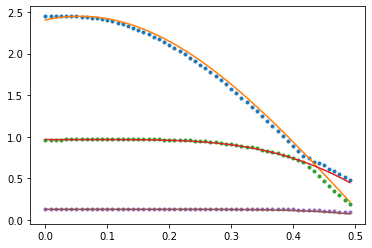

In [66]:

for i,f in enumerate(fxn):
    plt.plot(tl, xl[i],'.', tn, xl[i,0]+f(tn));

#### Aceleração do CM ####

In [67]:
# Cálculo da aceleração do CM
# 1. Posição do CM das bolas
xcml = xl[0].copy()
xcmn = xn[0].copy()
for i in range(1,N):
    xcml += xl[i]
    xcmn += xn[i]
xcml /= N
xcmn /= N

# 2. Aceleração do CM
pacml = np.polyder(np.polyfit(tl, xcml, PDEG), 2)
pacmn = np.polyder(np.polyfit(tn, xcmn, PDEG), 2)

acml = np.polyval(pacml,tl)
acmn = np.polyval(pacmn,tn)

-9.108778306078735


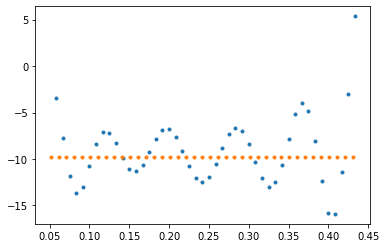

In [68]:
k=7
plt.plot(tl[k:-k],acml[k:-k],'.', tn[k:-k], acmn[k:-k],'.'); 
print(acml[k:-k].sum()/len(acml[k:-k]))

In [69]:
print("A_n =",np.average(acmn),"\nA_l =",np.average(acml[k:-k]))

A_n = -9.809999999999652 
A_l = -9.108778306078735


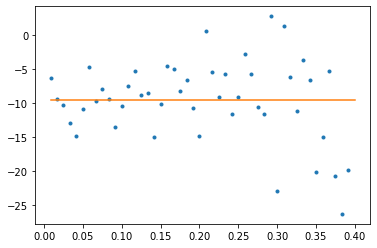

In [43]:
dt = (tl[-1]-tl[0]) / (len(tl) - 1)
ann=(xcml[2:] - 2*xcml[1:-1] + xcml[:-2]) / dt**2
plt.plot(tl[1:-2],ann[:-1],'.', tl[1:-1], np.average(ann[:-1])*np.ones(len(tl)-2));